# Loan Eligibility Prediction

#### Main aim of the project is that predict loan status for customer based on customer's information

## Steps to build model

#### 1) Data Collection
#### 2) Data Understanding
#### 3) Data Manipulation
#### 4) Data Visualization
#### 5) Build and Evaluate model 

## Problem Statements

#### 1) Visualize and calculate counts of married status of customers.
#### 2) Calculate and Visualize counts of Graduate and UnderGraduate applicants.
#### 3) Counts of customers who are self-employed and who are not self-employed.
#### 4) Counts of applicants who lives in urban, semi-urban and rural areas.
#### 5) Counts of credit history status of customers.
#### 6) Counts of members who are dependent on applicant.
#### 7) Visualize Loan amount of customer along with terms of Loan amount in days.

## So Lets Start !

## Import required Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data Collection

In [11]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
63,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
364,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
43,LP001197,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,N
42,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
260,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
30,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
96,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
330,LP002690,Male,No,0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,Y


#### Feature Engineering process

In [14]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [15]:
df.rename({'Self_Employed':'Self Employed'},axis = 1,inplace = True)

In [16]:
df.rename({'ApplicantIncome':'Applicant Income'},axis = 1,inplace = True)

In [17]:
df.rename({'CoapplicantIncome':'Co-Applicant Income'},axis = 1,inplace = True)

In [18]:
df.rename({'LoanAmount':'Loan Amount'},axis = 1,inplace = True)

In [19]:
df.rename({'Loan_Amount_Term':'Loan Tenure'},axis = 1,inplace = True)

In [20]:
df.rename({'Credit_History':'Credit History'},axis = 1,inplace = True)

In [21]:
df.rename({'Property_Area':'Property Area'},axis = 1,inplace = True)

In [22]:
df.rename({'Loan_Status':'Loan Status'},axis = 1,inplace = True)

In [23]:
df.head(2)

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History,Property Area,Loan Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Step 2 : Data Understanding

In [25]:
# Get all details about each features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               376 non-null    object 
 1   Married              381 non-null    object 
 2   Dependents           373 non-null    object 
 3   Education            381 non-null    object 
 4   Self Employed        360 non-null    object 
 5   Applicant Income     381 non-null    int64  
 6   Co-Applicant Income  381 non-null    float64
 7   Loan Amount          381 non-null    float64
 8   Loan Tenure          370 non-null    float64
 9   Credit History       351 non-null    float64
 10  Property Area        381 non-null    object 
 11  Loan Status          381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


#### Information about each features
###### Gender: Either male or female.
###### Married: Weather Married(yes) or Not Married(No).
###### Dependents: Number of persons depending on the client.
###### Education: Applicant Education(Graduate or Undergraduate).
###### Self Employed: Self-employed (Yes/No).
###### Applicant Income: Applicant income.
###### Co-Applicant Income: Co-applicant income.
###### Loan Amount: Loan amount in thousands.
###### Loan Tenure: Terms of the loan in months.
###### Credit History: Credit history meets guidelines.
###### Property Area: Applicants are living either Urban, Semi-Urban or Rural.
###### Loan Status: Loan approved (Y/N).

In [27]:
# Get the total counts of rows and columns of dataset
df.size

4572

In [28]:
# Get the number of rows and columns.
df.shape

(381, 12)

In [29]:
# Check unique values
df.apply(lambda col : col.unique())

Gender                                               [Male, Female, nan]
Married                                                        [Yes, No]
Dependents                                            [1, 0, 2, 3+, nan]
Education                                       [Graduate, Not Graduate]
Self Employed                                             [No, Yes, nan]
Applicant Income       [4583, 3000, 2583, 6000, 2333, 3200, 2500, 185...
Co-Applicant Income    [1508.0, 0.0, 2358.0, 1516.0, 700.0, 1840.0, 2...
Loan Amount            [128.0, 66.0, 120.0, 141.0, 95.0, 70.0, 109.0,...
Loan Tenure            [360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...
Credit History                                           [1.0, nan, 0.0]
Property Area                                  [Rural, Urban, Semiurban]
Loan Status                                                       [N, Y]
dtype: object

In [30]:
# Check null or missing values
df.isnull().sum()

Gender                  5
Married                 0
Dependents              8
Education               0
Self Employed          21
Applicant Income        0
Co-Applicant Income     0
Loan Amount             0
Loan Tenure            11
Credit History         30
Property Area           0
Loan Status             0
dtype: int64

In [31]:
# Check duplicate values
df.duplicated().sum()

0

In [32]:
# Checking outliers using descriptive analysis
df.describe()

,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### What you understand by your Data?
#### i) Dataset contain 381 rows and 12 coulmns.
#### ii) Total size of dataset is 4572.
#### iii) There are null or missing values in 'Gender','Dependents','Self Employed','Loan Tenure','Credit History' features. Hence, need to manipulate.
#### iv) Descriptive status is fine. After data manipulation we need to check descriptive status again.
#### v) There is no duplicate rows and columns
#### vi) Here there are no outliers.

### Step 3:  Data Manipulation

In [275]:
df.head

,Dependents,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History,Gender,Married,Education,Self Employed,Property Area,Loan Status
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,2,1


#### Perform manipulation on Gender features.

In [37]:
# Check null values in Gender.
df['Gender'].isnull().sum()

5

In [38]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [39]:
# Imputing mode value of Gender
df['Gender'].fillna('Male',inplace = True)

In [40]:
df['Gender'].isnull().sum()

0

#### Perform manipulation on Dependents features.

In [42]:
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [43]:
df['Dependents'] = df['Dependents'].replace('3+','3')

In [44]:
df['Dependents'].value_counts()

Dependents
0    234
2     59
1     52
3     28
Name: count, dtype: int64

In [45]:
# imputing mode value
df['Dependents'].fillna('0',inplace = True)

In [46]:
df['Dependents'].isnull().sum()

0

In [47]:
df['Dependents'] = df['Dependents'].astype(dtype = 'int')

#### Perform manipulation on Self Employed features.

In [49]:
df['Self Employed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Self Employed
Non-Null Count  Dtype 
--------------  ----- 
360 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [50]:
df['Self Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [51]:
df['Self Employed'].value_counts()

Self Employed
No     325
Yes     35
Name: count, dtype: int64

In [52]:
df['Self Employed'].isnull().sum()

21

In [53]:
# imputing mode value
df['Self Employed'].fillna('No',inplace = True)

In [54]:
df['Self Employed'].isnull().sum()

0

#### Perform manipulation on Credit History features.

In [56]:
df['Credit History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Credit History
Non-Null Count  Dtype  
--------------  -----  
351 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [57]:
df['Credit History'].unique()

array([ 1., nan,  0.])

In [58]:
df['Credit History'].value_counts()

Credit History
1.0    294
0.0     57
Name: count, dtype: int64

In [59]:
# imputing mode value
df['Credit History'].fillna(1.0,inplace = True)

In [60]:
df['Credit History'].isnull().sum()

0

#### Perform manipulation on Loan Tenure.

In [62]:
df['Loan Tenure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Loan Tenure
Non-Null Count  Dtype  
--------------  -----  
370 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [63]:
df['Loan Tenure'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  84.,  12.,  36.])

In [64]:
df['Loan Tenure'].isnull().sum()

11

In [65]:
# Less chances of outliers so impute mean value
df.describe()

,Dependents,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History
count,381.000000,381.000000,381.000000,381.000000,370.000000,381.000000
mean,0.666667,3579.845144,1277.275381,104.986877,340.864865,0.850394
std,0.987643,1419.813818,2340.818114,28.358464,68.549257,0.357154
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,0.000000,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,1.000000,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,3.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


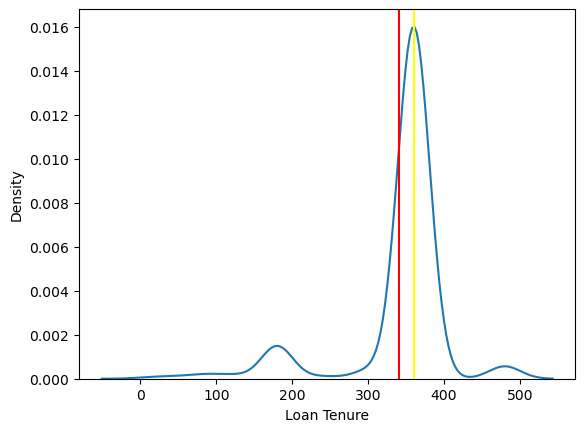

In [66]:
mean = df['Loan Tenure'].mean()
med = df['Loan Tenure'].median()
sns.distplot(df['Loan Tenure'],hist = False)
plt.axvline(mean, c = 'red')
plt.axvline(med, c = 'yellow')
plt.show()

In [67]:
# Impute mean value
df['Loan Tenure'].fillna(df['Loan Tenure'].mean(),inplace = True)

In [68]:
df['Loan Tenure'].isnull().sum()

0

In [69]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self Employed          0
Applicant Income       0
Co-Applicant Income    0
Loan Amount            0
Loan Tenure            0
Credit History         0
Property Area          0
Loan Status            0
dtype: int64

#### Here all missing values imputed by mode and mean values

### Step 4 : Data Visualization

#### Problem Statements

#### i) Univariate Analysis

##### Visualize and calculate counts of married status of customers.

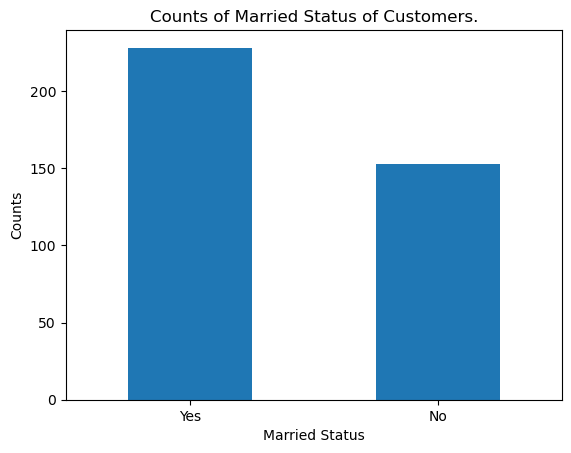

In [75]:
df['Married'].value_counts().plot(kind = 'bar')
plt.title('Counts of Married Status of Customers.')
plt.xlabel('Married Status')
plt.ylabel('Counts')
plt.xticks(rotation = 0)
plt.show()

In [76]:
df['Married'].value_counts()

Married
Yes    228
No     153
Name: count, dtype: int64

##### Calculate and Visualize counts of Graduate and UnderGraduate applicants.

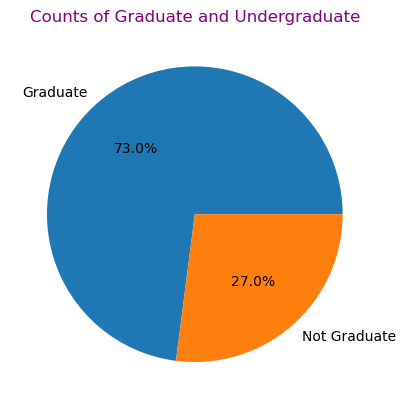

In [78]:
df['Education'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Counts of Graduate and Undergraduate',color ='purple')
plt.ylabel('')
plt.show()

##### Counts of customers who are self employed and who are not self employed.

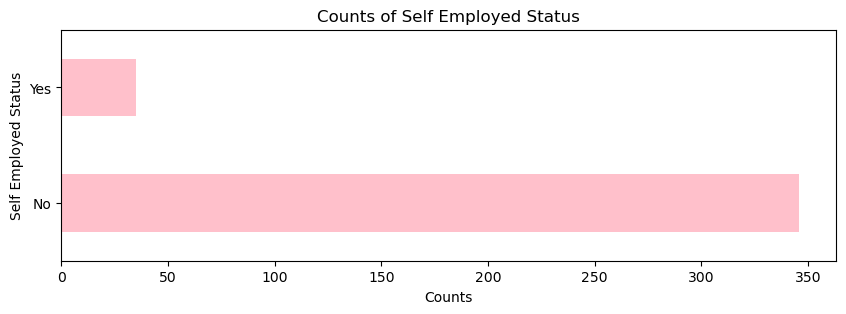

In [80]:
plt.figure(figsize = [10,3])
df['Self Employed'].value_counts().plot(kind = 'barh',color = 'pink')
plt.title('Counts of Self Employed Status')
plt.xlabel('Counts')
plt.ylabel('Self Employed Status')
plt.show()

##### Counts of applicants who lives in urban, semi-urban and rural areas.

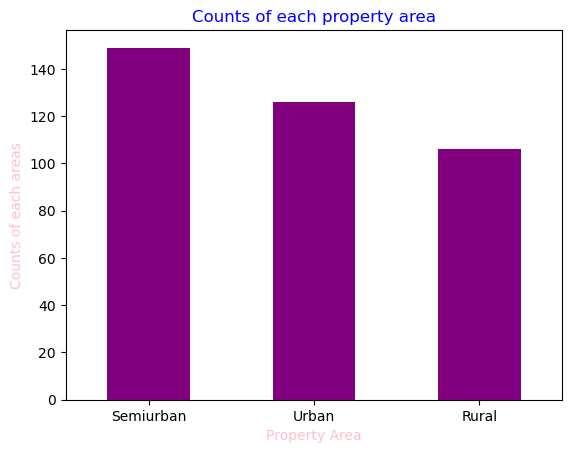

In [82]:
df['Property Area'].value_counts().plot(kind = 'bar',color = 'purple')
plt.title('Counts of each property area',color = 'blue')
plt.xlabel('Property Area',color = 'pink')
plt.ylabel('Counts of each areas',color = 'pink')
plt.xticks(rotation = 0)
plt.show()

##### Counts of credit history status of customers.

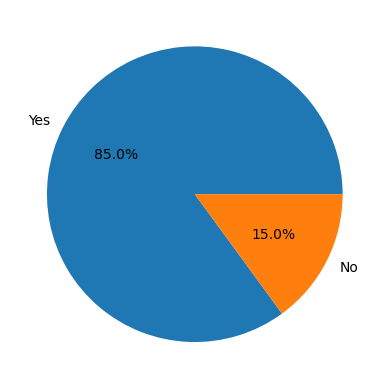

In [84]:
df['Credit History'].apply(lambda x : f'Yes' if x == 1.0 else  f'No').value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

##### Counts of members who are dependent on applicant.

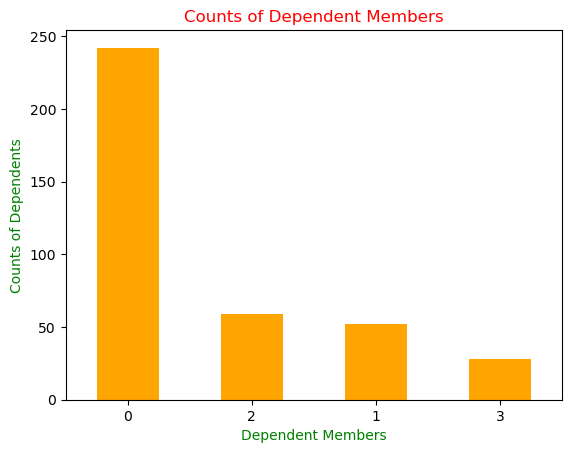

In [86]:
df['Dependents'].value_counts().plot(kind = 'bar',color = 'orange')
plt.title('Counts of Dependent Members',color = 'red')
plt.xlabel('Dependent Members',color = 'green')
plt.ylabel('Counts of Dependents',color = 'green')
plt.xticks(rotation = 0)
plt.show()

#### ii) Bivariate Analysis

##### Visualize Loan amount of customer along with terms of Loan amount in days.

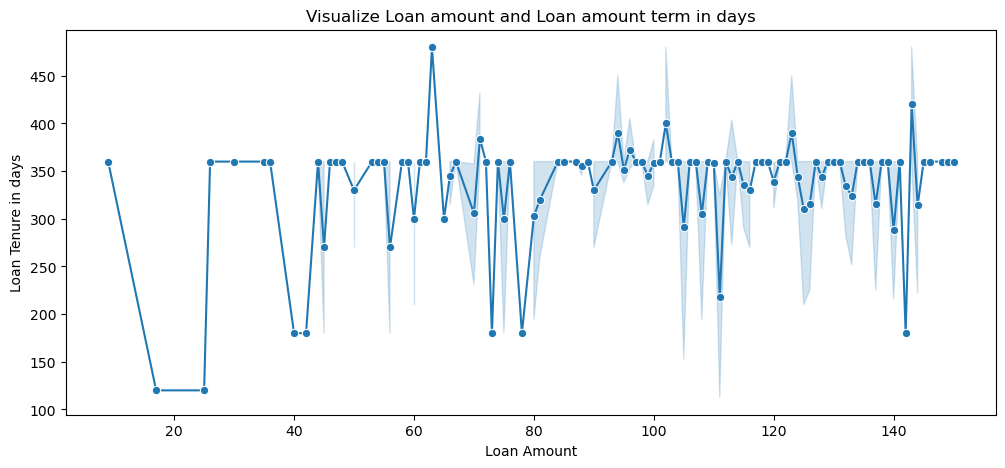

In [89]:
plt.figure(figsize = [12,5])
sns.lineplot(data = df,x = 'Loan Amount',y = 'Loan Tenure',marker = 'o')
plt.title('Visualize Loan amount and Loan amount term in days')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Tenure in days')
plt.show()

#### Perform Encoding

In [91]:
# Split dataset in numerical and categorical
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include = ['int','float'])

In [92]:
# Transform Categorical variables into numerical values
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [93]:
# Combine Categorical and Numerical data
df = pd.concat([df_num,df_cat],axis = 1)

In [94]:
df.head()

,Dependents,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History,Gender,Married,Education,Self Employed,Property Area,Loan Status
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,2,1


#### iii) Multivariate Analysis

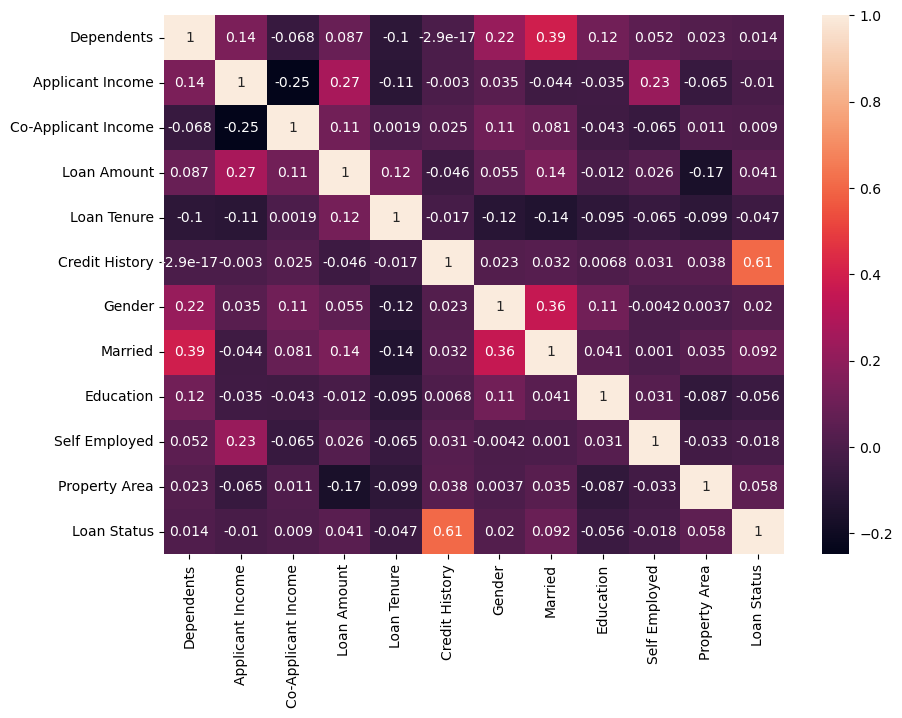

In [96]:
corr = df.corr()
plt.figure(figsize = [10,7])
sns.heatmap(corr,annot = True)
plt.show()

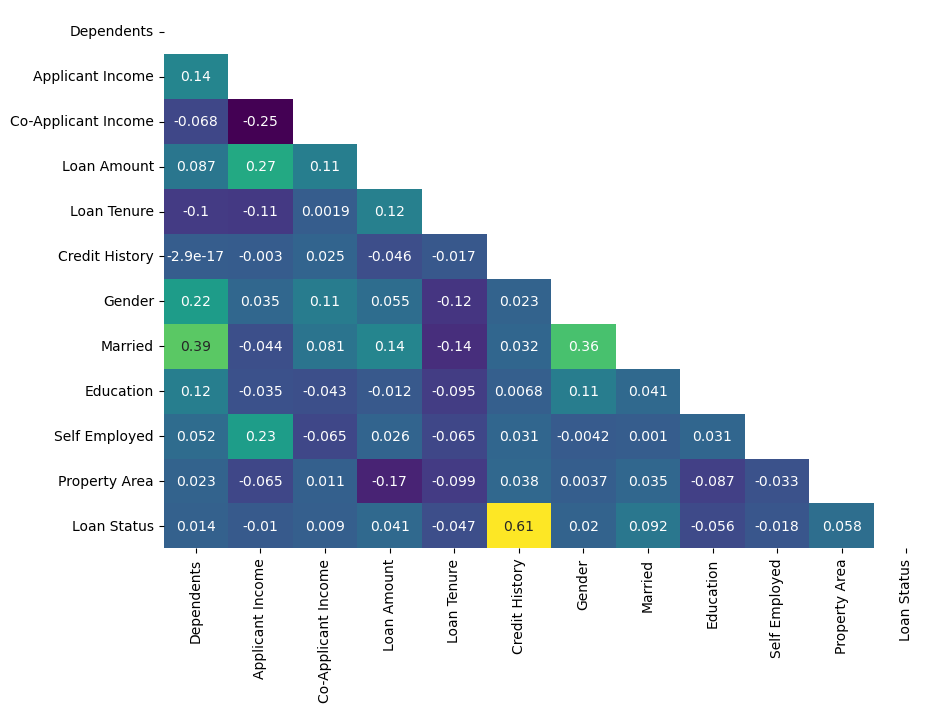

In [97]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = [10,7])
sns.heatmap(corr,annot = True,mask = mask,cmap = 'viridis',cbar = False)
plt.show()

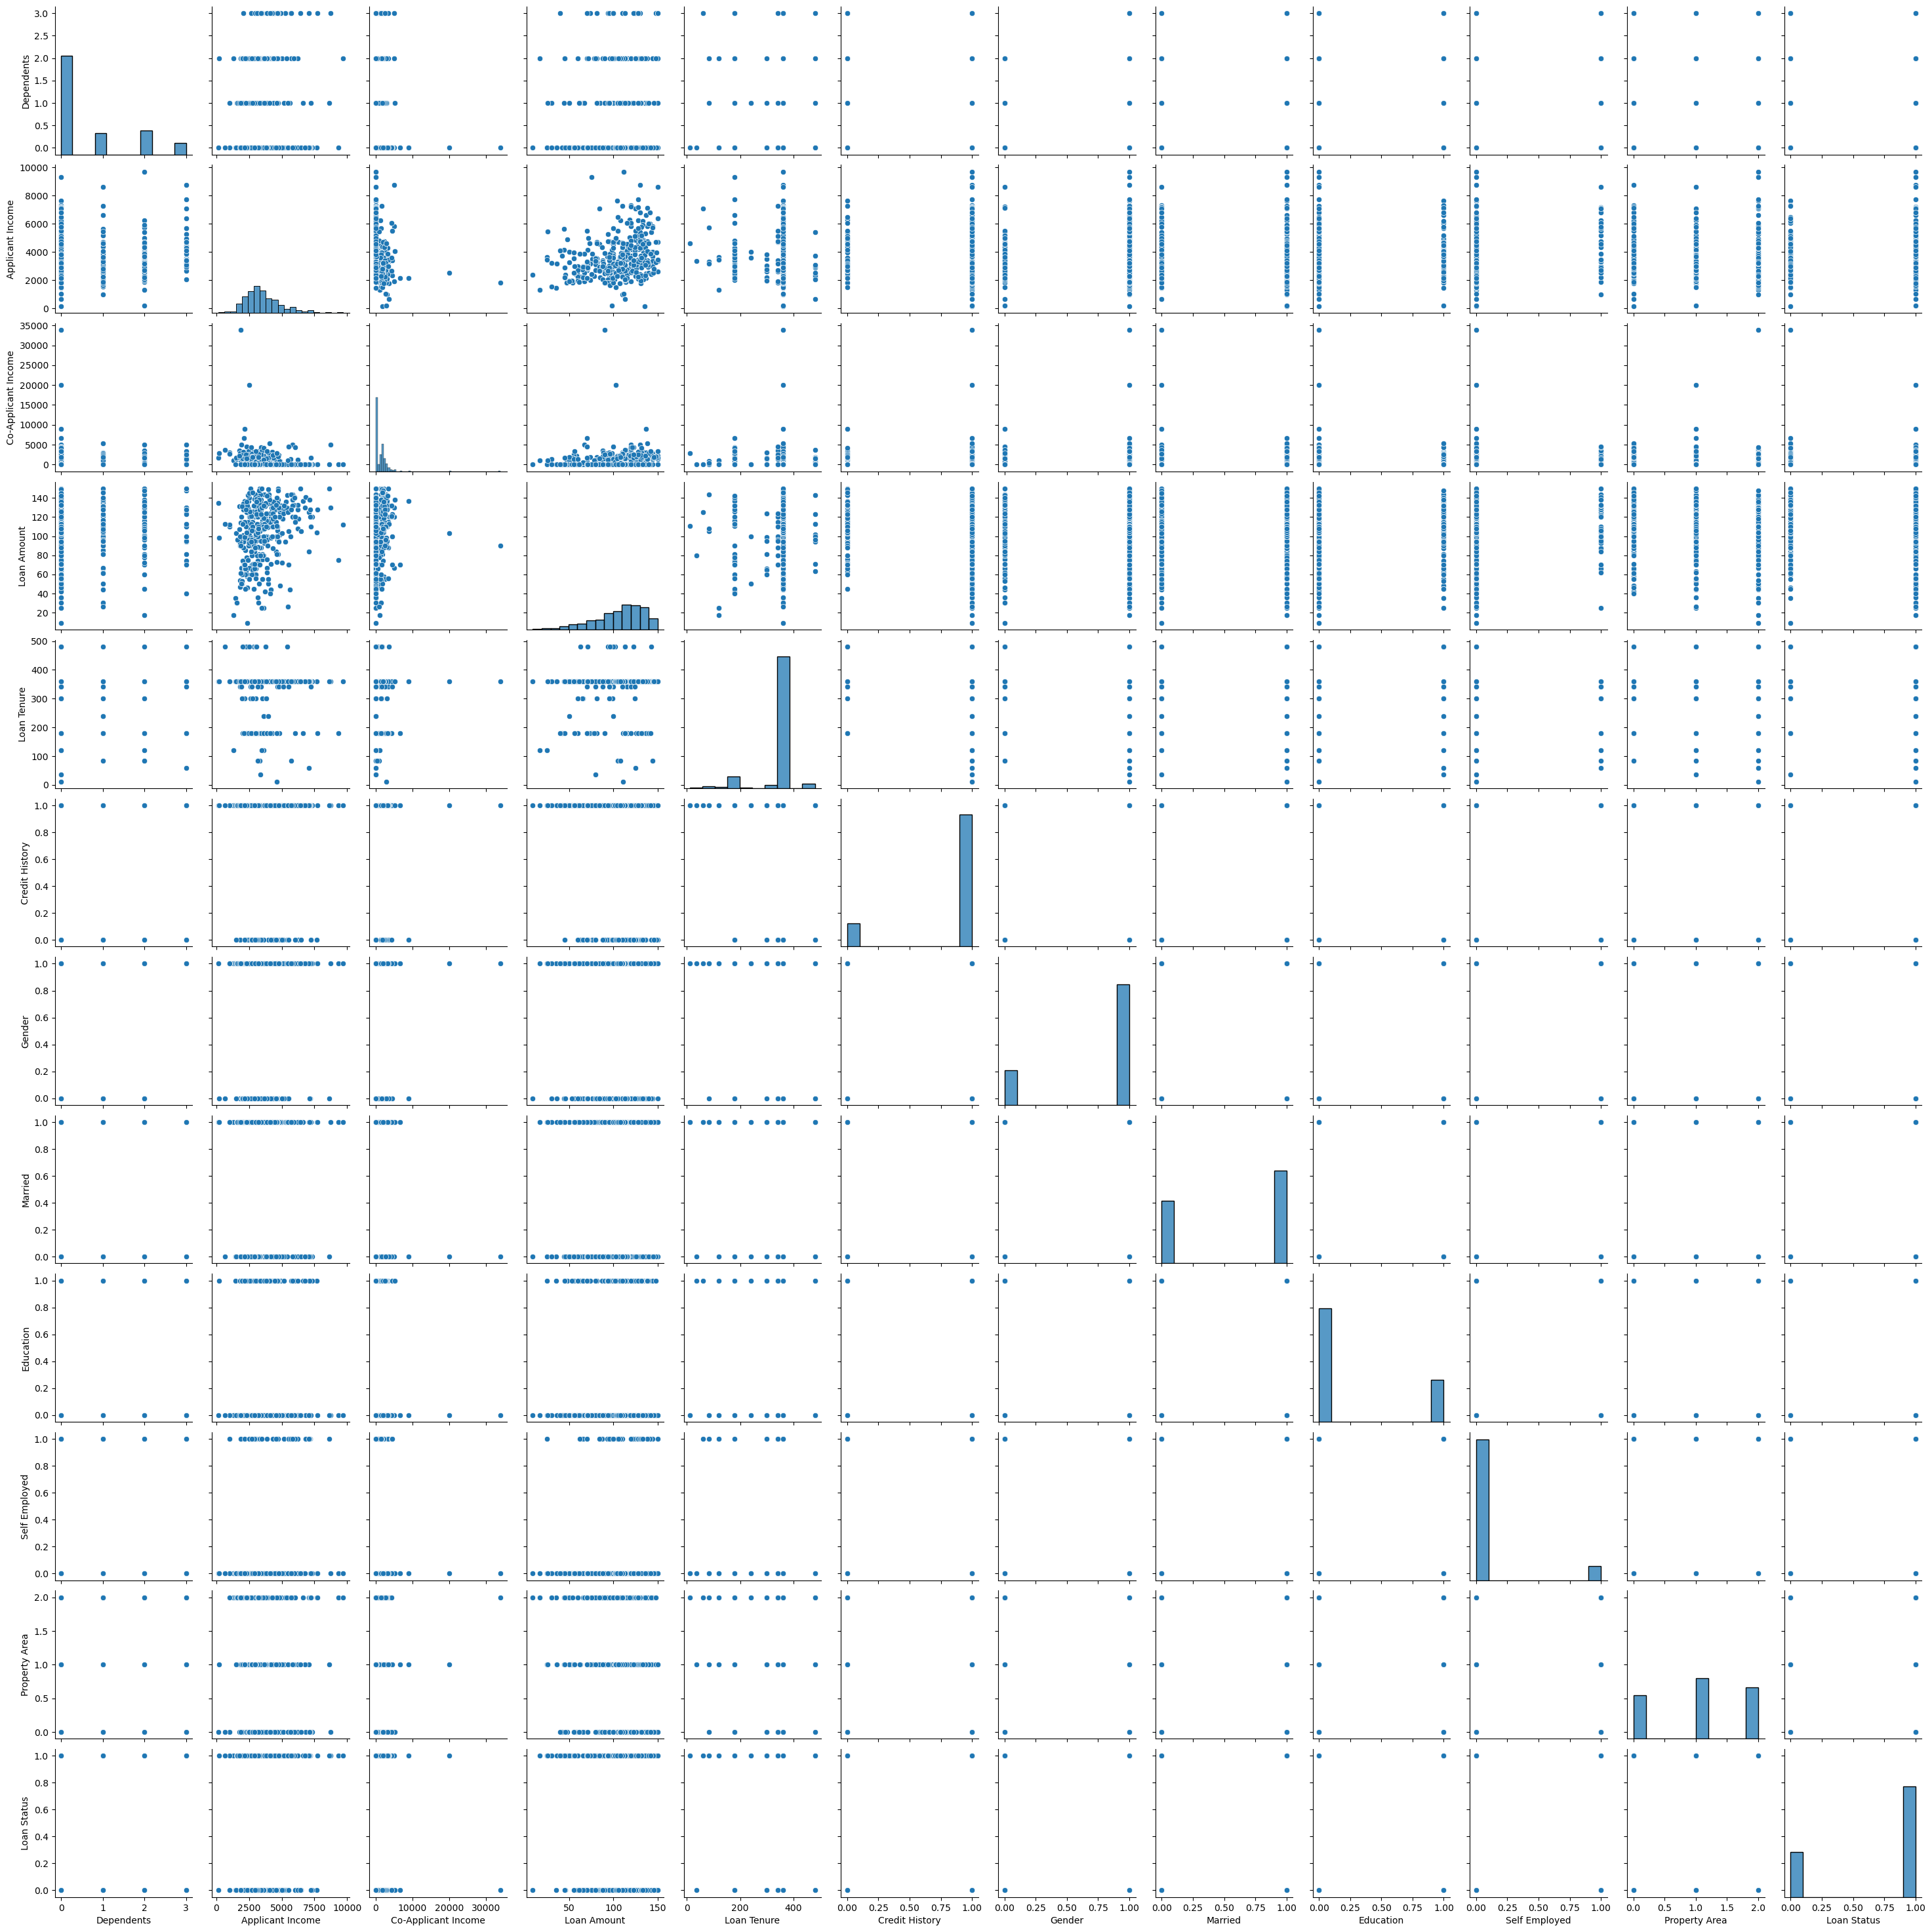

In [98]:
sns.pairplot(df)
plt.show()

#### Steps before applying Machine Learning Model

In [100]:
# Split data into dependent and independent variables
x = df.loc[:,['Gender','Married','Dependents','Education','Self Employed','Applicant Income','Co-Applicant Income','Loan Amount','Loan Tenure','Credit History','Property Area']]
y = df.loc[:,'Loan Status']

In [101]:
x.head()

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan Tenure,Credit History,Property Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2


In [102]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan Status, dtype: int32

In [103]:
# Split data into Train and Test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 3)

### Step 5 : Build Model and Evaluate Performance of Model

#### Steps to build a model using user-defined function

In [106]:
def models(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    print('Training Accuracy',model.score(xtrain,ytrain))
    print('Testing Accuracy',model.score(xtest,ytest))
    return model

#### Create Instances for LogisticRegression, K-Nearest-Neighbor and Support Vector Machine Models

In [108]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

#### LogisticRegression

###### Build and Evaluate LogisticRegression model

In [111]:
models(logreg)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77

Training Accuracy 0.8355263157894737
Testing Accuracy 0.8571428571428571


LogisticRegression()

#### Apply Hypertunning on LogisticRegression

In [113]:
lr = LogisticRegression(penalty = 'l2',solver = 'liblinear')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77

Training Accuracy 0.8388157894736842
Testing Accuracy 0.8571428571428571


LogisticRegression(solver='liblinear')

In [114]:
lr = LogisticRegression(penalty = 'l2',solver = 'sag')
models(lr)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 0.7302631578947368
Testing Accuracy 0.6363636363636364


LogisticRegression(solver='sag')

In [115]:
lr = LogisticRegression(penalty = 'l2',solver = 'saga')
models(lr)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 0.7302631578947368
Testing Accuracy 0.6363636363636364


LogisticRegression(solver='saga')

In [116]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77

Training Accuracy 0.8388157894736842
Testing Accuracy 0.8571428571428571


LogisticRegression(penalty='l1', solver='liblinear')

In [117]:
lr = LogisticRegression(penalty = 'l1',solver = 'saga')
models(lr)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 0.7302631578947368
Testing Accuracy 0.6363636363636364


LogisticRegression(penalty='l1', solver='saga')

#### Evaluate Model using ROC-AUC metrics

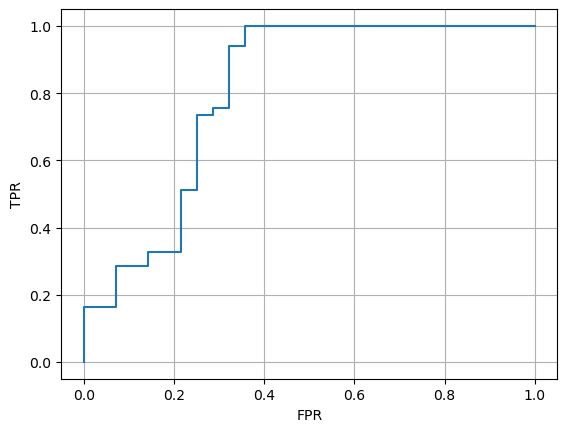

In [119]:
ypredprob = logreg.predict_proba(xtest)[:,1]
fpr,tpr,thresh = roc_curve(ytest,ypredprob)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

In [120]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77

Training Accuracy 0.8388157894736842
Testing Accuracy 0.8571428571428571


LogisticRegression(penalty='l1', solver='liblinear')

#### Sensitivity and Specificity of Logistic Regression model

In [122]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 49 / (49+10)
TPR

0.8305084745762712

In [123]:
# Specificity:
#TNR = TN / TN + FP
TNR = 18 / (18+0)
TNR

1.0

#### K-Nearest-Neighbor

###### Build and Evaluate K-Nearest-Neighbor model

In [126]:
models(knn)

[[ 7 21]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.47      0.25      0.33        28
           1       0.66      0.84      0.74        49

    accuracy                           0.62        77
   macro avg       0.56      0.54      0.53        77
weighted avg       0.59      0.62      0.59        77

Training Accuracy 0.7664473684210527
Testing Accuracy 0.6233766233766234


KNeighborsClassifier()

#### Apply Hypertunning on K-Nearest-Neighbor

In [128]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    print(i)
    models(knn)

1
[[ 8 20]
 [11 38]]
              precision    recall  f1-score   support

           0       0.42      0.29      0.34        28
           1       0.66      0.78      0.71        49

    accuracy                           0.60        77
   macro avg       0.54      0.53      0.53        77
weighted avg       0.57      0.60      0.58        77

Training Accuracy 1.0
Testing Accuracy 0.5974025974025974
2
[[16 12]
 [21 28]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        28
           1       0.70      0.57      0.63        49

    accuracy                           0.57        77
   macro avg       0.57      0.57      0.56        77
weighted avg       0.60      0.57      0.58        77

Training Accuracy 0.8289473684210527
Testing Accuracy 0.5714285714285714
3
[[11 17]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        28
           1       0.72      0.88      0.79

##### Here from above process 1 and 6 hypertunning values gives highest accuarcy

In [130]:
# Here Target values are even so here I select odd hypertunning value which is 1
np.sqrt(len(ytest))

8.774964387392123

##### Best Hypertunning value is 1

In [132]:
knn = KNeighborsClassifier(n_neighbors = 1)
models(knn)

[[ 8 20]
 [11 38]]
              precision    recall  f1-score   support

           0       0.42      0.29      0.34        28
           1       0.66      0.78      0.71        49

    accuracy                           0.60        77
   macro avg       0.54      0.53      0.53        77
weighted avg       0.57      0.60      0.58        77

Training Accuracy 1.0
Testing Accuracy 0.5974025974025974


KNeighborsClassifier(n_neighbors=1)

#### Sensitivity and Specificity of K-Nearest-Neighbor model.

In [134]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 44 / (44+14)
TPR

0.7586206896551724

In [135]:
# Specificity:
#TNR = TN / TN + FP
TNR = 14 / (14+5)
TNR

0.7368421052631579

#### Support Vector Machine

###### Build and Evaluate K-Nearest-Neighbor model

In [138]:
models(svm)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 0.7335526315789473
Testing Accuracy 0.6363636363636364


SVC()

#### Apply hypertunning on SVM

In [140]:
svm = SVC(kernel = 'linear')
models(svm)

[[17 11]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        28
           1       0.82      1.00      0.90        49

    accuracy                           0.86        77
   macro avg       0.91      0.80      0.83        77
weighted avg       0.88      0.86      0.85        77

Training Accuracy 0.8355263157894737
Testing Accuracy 0.8571428571428571


SVC(kernel='linear')

In [141]:
svm = SVC(kernel = 'poly')
models(svm)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 0.7335526315789473
Testing Accuracy 0.6363636363636364


SVC(kernel='poly')

In [142]:
svm = SVC(kernel = 'sigmoid')
models(svm)

[[ 4 24]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        28
           1       0.65      0.92      0.76        49

    accuracy                           0.64        77
   macro avg       0.58      0.53      0.49        77
weighted avg       0.60      0.64      0.57        77

Training Accuracy 0.6644736842105263
Testing Accuracy 0.6363636363636364


SVC(kernel='sigmoid')

In [143]:
grid = {'C' : [1,10],'gamma' : [1,10]}
gs = GridSearchCV(svm,grid,verbose = 3)
gs.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.738 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.738 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.721 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.721 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.733 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.738 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.738 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.721 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.721 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.733 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.738 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [144]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [145]:
svm = SVC(C = 1, gamma = 10)
models(svm)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77

Training Accuracy 1.0
Testing Accuracy 0.6363636363636364


SVC(C=1, gamma=10)

In [146]:
svm = SVC(kernel = 'linear')
models(svm)

[[17 11]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        28
           1       0.82      1.00      0.90        49

    accuracy                           0.86        77
   macro avg       0.91      0.80      0.83        77
weighted avg       0.88      0.86      0.85        77

Training Accuracy 0.8355263157894737
Testing Accuracy 0.8571428571428571


SVC(kernel='linear')

#### Sensitivity and Specificity of Support Vector Machine model.

In [148]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 49 / (49+10)
TPR

0.8305084745762712

In [149]:
# Specificity:
#TNR = TN / TN + FP
TNR = 18 / (18+0)
TNR

1.0

In [150]:
models(dt)

[[18 10]
 [11 38]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.79      0.78      0.78        49

    accuracy                           0.73        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.73      0.73      0.73        77

Training Accuracy 1.0
Testing Accuracy 0.7272727272727273


DecisionTreeClassifier()

In [151]:
rf = RandomForestClassifier()
adap = AdaBoostClassifier()
grad = GradientBoostingClassifier()

In [152]:
models(rf)

[[19  9]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.83      0.92      0.87        49

    accuracy                           0.83        77
   macro avg       0.83      0.80      0.81        77
weighted avg       0.83      0.83      0.83        77

Training Accuracy 1.0
Testing Accuracy 0.8311688311688312


RandomForestClassifier()

In [153]:
models(adap)

[[18 10]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.81      0.88      0.84        49

    accuracy                           0.79        77
   macro avg       0.78      0.76      0.77        77
weighted avg       0.79      0.79      0.79        77

Training Accuracy 0.9046052631578947
Testing Accuracy 0.7922077922077922


AdaBoostClassifier()

In [154]:
models(grad)

[[18 10]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.82      0.92      0.87        49

    accuracy                           0.82        77
   macro avg       0.82      0.78      0.79        77
weighted avg       0.82      0.82      0.81        77

Training Accuracy 0.9605263157894737
Testing Accuracy 0.8181818181818182


GradientBoostingClassifier()

In [155]:
ypred_lr = lr.predict(xtest)
ypred_knn = knn.predict(xtest)
ypred_dt = dt.predict(xtest)
ypred_rf = rf.predict(xtest)
ypred_adap = adap.predict(xtest)
ypred_grad = grad.predict(xtest)
ypred_svm = svm.predict(xtest)

In [156]:
lr_acc = accuracy_score(ytest,ypred_lr)
knn_acc = accuracy_score(ytest,ypred_knn)
dt_acc = accuracy_score(ytest,ypred_dt)
rf_acc = accuracy_score(ytest,ypred_rf)
adap_acc = accuracy_score(ytest,ypred_adap)
grad_acc = accuracy_score(ytest,ypred_grad)
svm_acc = accuracy_score(ytest,ypred_svm)

In [157]:
train_lr = lr.score(xtrain,ytrain)
train_knn = knn.score(xtrain,ytrain)
train_dt = dt.score(xtrain,ytrain)
train_rf = rf.score(xtrain,ytrain)
train_adap = adap.score(xtrain,ytrain)
train_grad = grad.score(xtrain,ytrain)
train_svm = svm.score(xtrain,ytrain)

In [158]:
test_lr = lr.score(xtest,ytest)
test_knn = knn.score(xtest,ytest)
test_dt = dt.score(xtest,ytest)
test_rf = rf.score(xtest,ytest)
test_adap = adap.score(xtest,ytest)
test_grad = grad.score(xtest,ytest)
test_svm = svm.score(xtest,ytest)

In [159]:
models_accuracy = pd.DataFrame({'Model Name':['Logistic Regression','KNN','Decision Tree','Random Forest','Adaptive Boosting Classifier','Gradient Boosting Classifier','SVM'],'Model Accuracy':[lr_acc,knn_acc,dt_acc,rf_acc,adap_acc,grad_acc,svm_acc],'Training Accuracy':[train_lr,train_knn,train_dt,train_rf,train_adap,train_grad,train_svm],'Testing Accuracy':[test_lr,test_knn,test_dt,test_rf,test_adap,test_grad,test_svm]})

In [160]:
models_accuracy

,Model Name,Model Accuracy,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.857143,0.838816,0.857143
1,KNN,0.597403,1.000000,0.597403
2,Decision Tree,0.727273,1.000000,0.727273
3,Random Forest,0.831169,1.000000,0.831169
4,Adaptive Boosting Classifier,0.792208,0.904605,0.792208
5,Gradient Boosting Classifier,0.818182,0.960526,0.818182
6,SVM,0.857143,0.835526,0.857143


## Conclusion:
#### Main goal of project is to predict loan status of customer based on various features.
#### Here are some steps which I covered :
### 1) Data Collection:
#####      Data collected from kaggle.com.
### 2) Data Understanding:
#####      Gets all detail information about dataset such as feature Name, data types, number of rows and columns,total size of dataset.
#####      i) Try to find null or missing values.
#####      ii) Checking outliers.
#####      iii) Finding Duplicate values.
### 3) Data Manipulation:
#####       i) Replaced missing values using imputation process.
### 4) Data Visualization:
#####       Here finding out some problem statements or insights in a datasets and visualize it.
### 5) Build Model:
#####       Logistic Regression,K-Nearest-Neighbor,Decision Tree,RandomForest Classifier,Adaptive Boosting Classifier,Gradient Boosting Classifier and Support Vector Machine.
### 6) Evaluation model:
#####       Calculated performance or accuarcy of a model.
#####       Try to compared accuracy of a models.
#####       Using Logistic Regression accuracy of a model is 85%.
#####       Using K-Nearest-Neighbor accuracy of a model is 59%.
#####       Using Decision Tree accuracy of a model is 70%.
#####       Using RandomForest Classifier accuracy of a model is 83%.
#####       Using Adaptive Boosting Classifier accuracy of a model is 79%.
#####       Using Gradient Boosting Classifier accuracy of a model is 81%.
#####       Using Support Vector Machine accuracy of a model is 85%.

#### Best algorithm to prepare model is Logistic Regression and  Support Vector Machine because its overall accuracy 85%.

In [163]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
accuracy_score(ytest,ypred)

0.8571428571428571

In [164]:
with open('Loan_Predictor.pkl',mode = 'wb') as pkl:
    pickle.dump(lr,pkl)